# Netflix Data Analysis

This project explores Netflix content data using Python. Below is the EDA section.

In [3]:
# notebooks/02-eda.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load cleaned dataset
df = pd.read_csv('../datasets/netflix_cleaned.csv')

# Overview
print("Shape:", df.shape)
df.head()


Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##  Content Type Distribution (Movies vs. TV Shows)

C:\Users\II\AppData\Local\Temp\ipykernel_8852\2450923841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


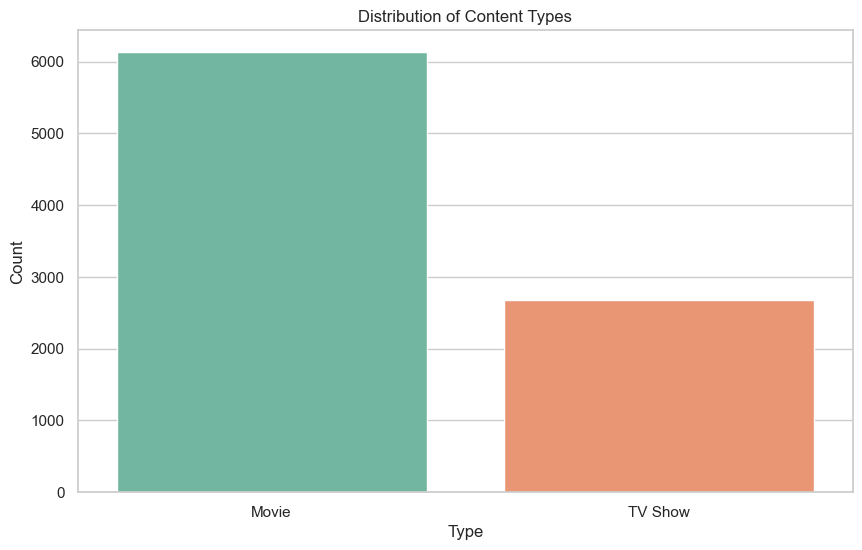

In [5]:
type_counts = df['type'].value_counts()

sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


## New Titles Added Per Year


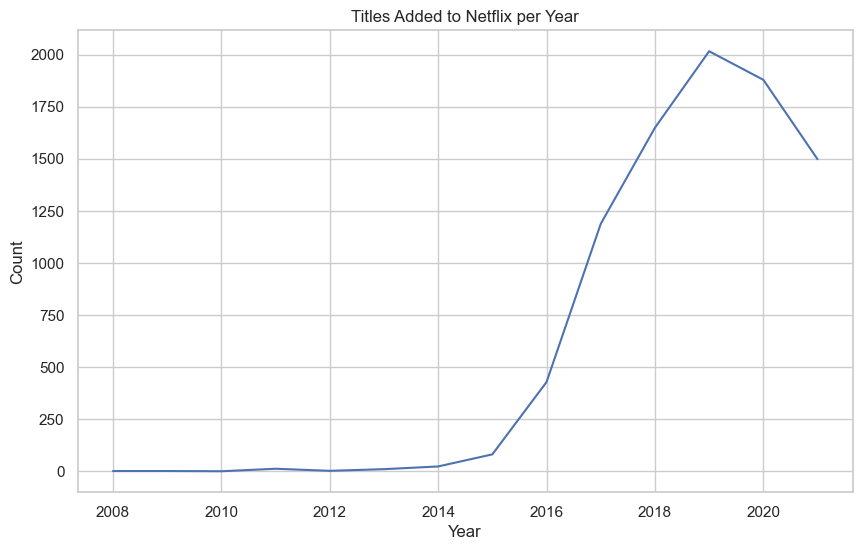

In [7]:
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

year_counts = df['year_added'].value_counts().sort_index()

sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.title('Titles Added to Netflix per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


## Top Countries Producing Content
 

C:\Users\II\AppData\Local\Temp\ipykernel_8852\357494407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='muted')


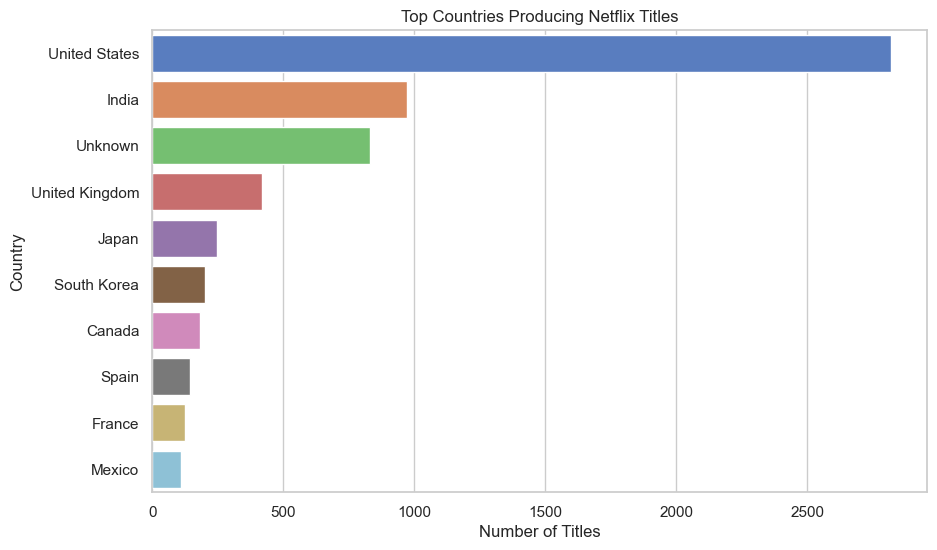

In [10]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(y=top_countries.index, x=top_countries.values, palette='muted')
plt.title('Top Countries Producing Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


## Most Frequent Cast Members


C:\Users\II\AppData\Local\Temp\ipykernel_8852\3711763177.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=names, palette='cool')


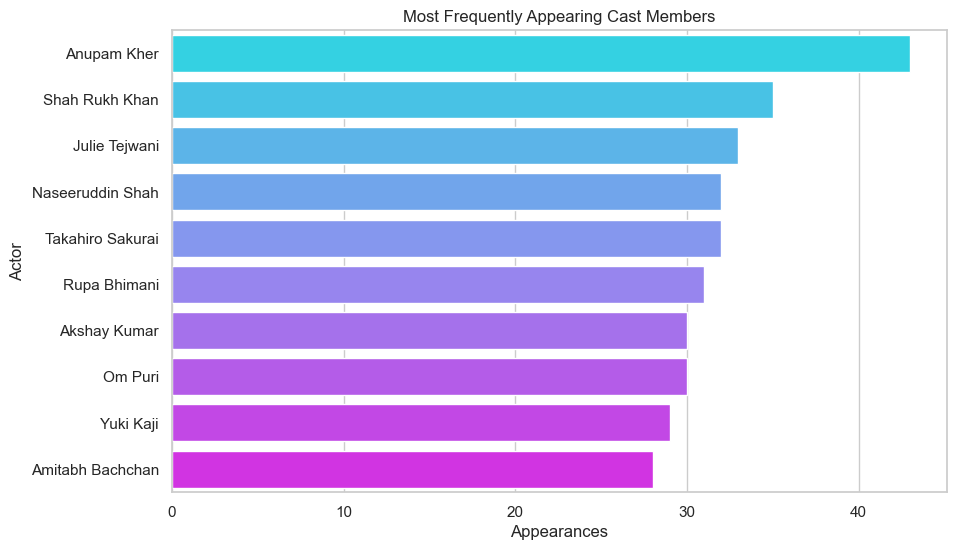

In [13]:
from collections import Counter

cast_series = df['cast'].dropna().str.split(', ')
flat_cast = [actor for sublist in cast_series for actor in sublist if actor != 'Unknown']
top_cast = Counter(flat_cast).most_common(10)

names, counts = zip(*top_cast)

sns.barplot(x=counts, y=names, palette='cool')
plt.title('Most Frequently Appearing Cast Members')
plt.xlabel('Appearances')
plt.ylabel('Actor')
plt.show()


## Top Genres on Netflix


C:\Users\II\AppData\Local\Temp\ipykernel_8852\3358804497.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=names, palette='Blues_d')


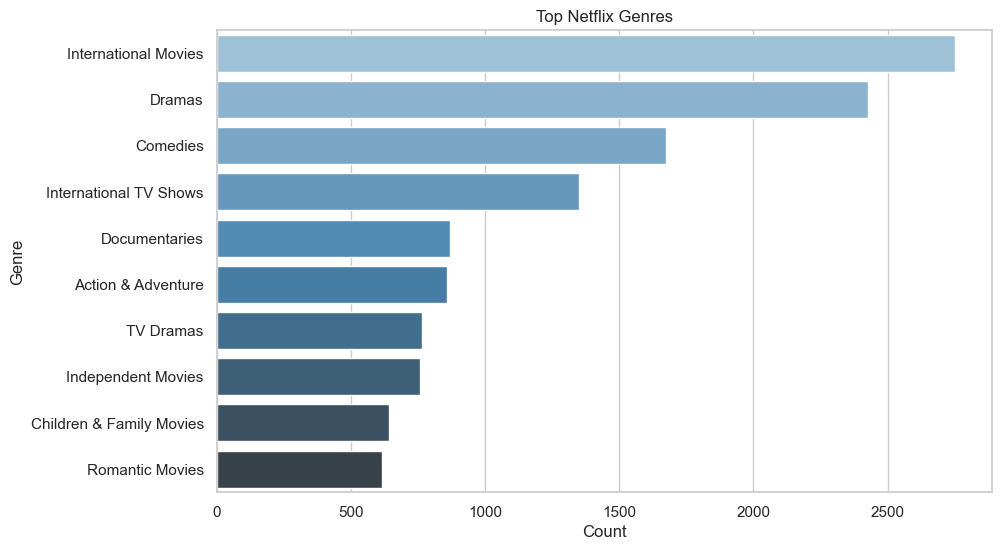

In [18]:
genre_series = df['listed_in'].str.split(', ')
flat_genres = [genre for sublist in genre_series for genre in sublist]
top_genres = Counter(flat_genres).most_common(10)

names, counts = zip(*top_genres)

sns.barplot(x=counts, y=names, palette='Blues_d')
plt.title('Top Netflix Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


## Rating Distribution


C:\Users\II\AppData\Local\Temp\ipykernel_8852\1276974481.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='pastel')


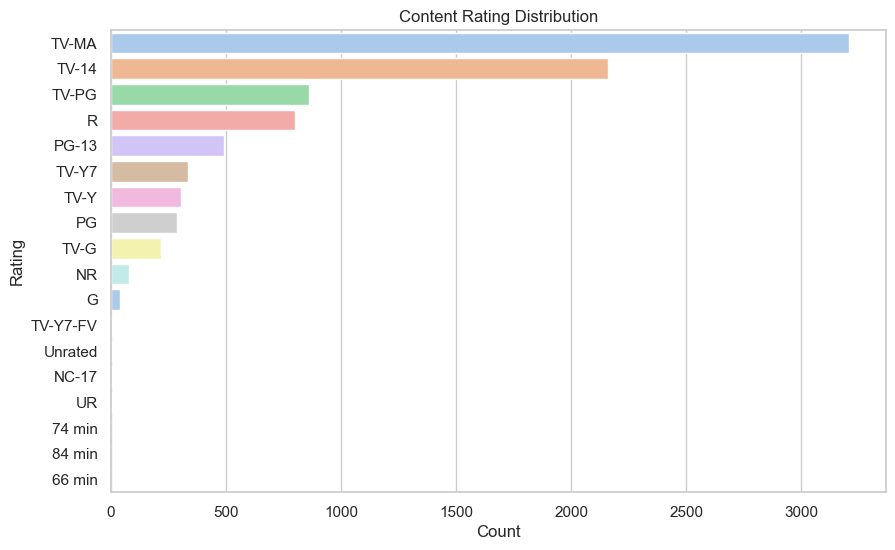

In [21]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='pastel')
plt.title('Content Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()
